สมาชิกผู้จัดทำ

สิทธิเจตน์ วงศ์ทิชาวัฒน์ 6210503853

นทวัจน์ เมี้ยนละม้าย 6210503624

# Threading in python
https://www.geeksforgeeks.org/multithreading-python-set-1/

In [ ]:
import threading 
  
def print_cube(num): 
    """ 
    function to print cube of given num 
    """
    print("Cube: {}".format(num * num * num)) 
  
def print_square(num): 
    """ 
    function to print square of given num 
    """
    print("Square: {}".format(num * num)) 
  
if __name__ == "__main__": 
    # creating thread 
    t1 = threading.Thread(target=print_square, args=(10,)) 
    t2 = threading.Thread(target=print_cube, args=(10,)) 
  
    # starting thread 1 
    t1.start() 
    # starting thread 2 
    t2.start() 
  
    # wait until thread 1 is completely executed 
    t1.join() 
    # wait until thread 2 is completely executed 
    t2.join() 
  
    # both threads completely executed 
    print("Done!") 

Square: 100
Cube: 1000
Done!


# Thread synchronization

https://www.geeksforgeeks.org/multithreading-in-python-set-2-synchronization/

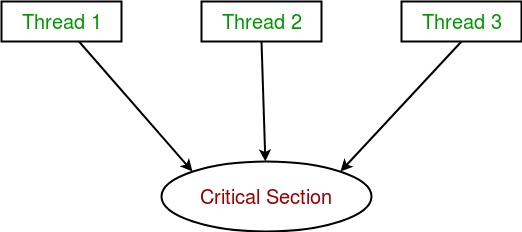



In [ ]:
import threading

# global variable x
x = 0

def increment():
	"""
	function to increment global variable x
	"""
	global x
	x += 1

def thread_task():
	"""
	task for thread
	calls increment function 100000 times.
	"""
	for _ in range(100000):
		increment()

def main_task():
	global x
	# setting global variable x as 0
	x = 0

	# creating threads
	t1 = threading.Thread(target=thread_task)
	t2 = threading.Thread(target=thread_task)

	# start threads
	t1.start()
	t2.start()

	# wait until threads finish their job
	t1.join()
	t2.join()

if __name__ == "__main__":
	for i in range(10):
		main_task()
		print("Iteration {0}: x = {1}".format(i,x))


Iteration 0: x = 200000
Iteration 1: x = 200000
Iteration 2: x = 200000
Iteration 3: x = 138113
Iteration 4: x = 170077
Iteration 5: x = 100000
Iteration 6: x = 169701
Iteration 7: x = 169331
Iteration 8: x = 160944
Iteration 9: x = 150535


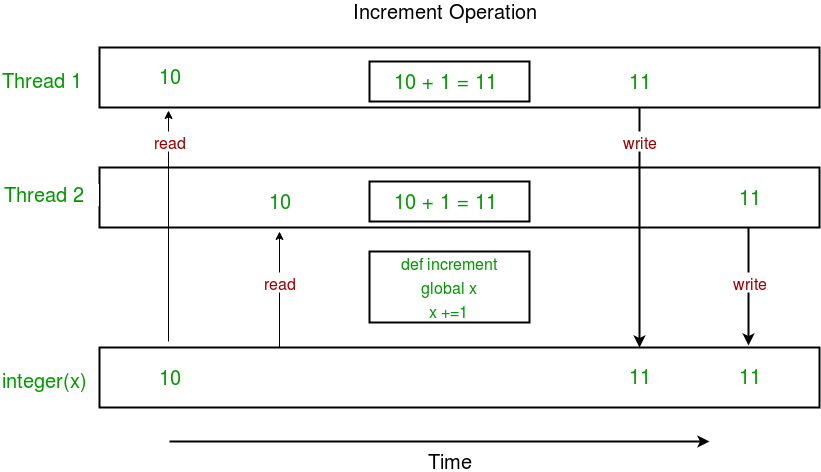

# using threading lock

In [ ]:
import threading

# global variable x
x = 0

def increment():
	"""
	function to increment global variable x
	"""
	global x
	x += 1

def thread_task(lock):
	"""
	task for thread
	calls increment function 100000 times.
	"""
	for _ in range(100000):
		lock.acquire()
		increment()
		lock.release()

def main_task():
	global x
	# setting global variable x as 0
	x = 0

	# creating a lock
	lock = threading.Lock()

	# creating threads
	t1 = threading.Thread(target=thread_task, args=(lock,))
	t2 = threading.Thread(target=thread_task, args=(lock,))

	# start threads
	t1.start()
	t2.start()

	# wait until threads finish their job
	t1.join()
	t2.join()

if __name__ == "__main__":
	for i in range(10):
		main_task()
		print("Iteration {0}: x = {1}".format(i,x))


Iteration 0: x = 200000
Iteration 1: x = 200000
Iteration 2: x = 200000
Iteration 3: x = 200000
Iteration 4: x = 200000
Iteration 5: x = 200000
Iteration 6: x = 200000
Iteration 7: x = 200000
Iteration 8: x = 200000
Iteration 9: x = 200000


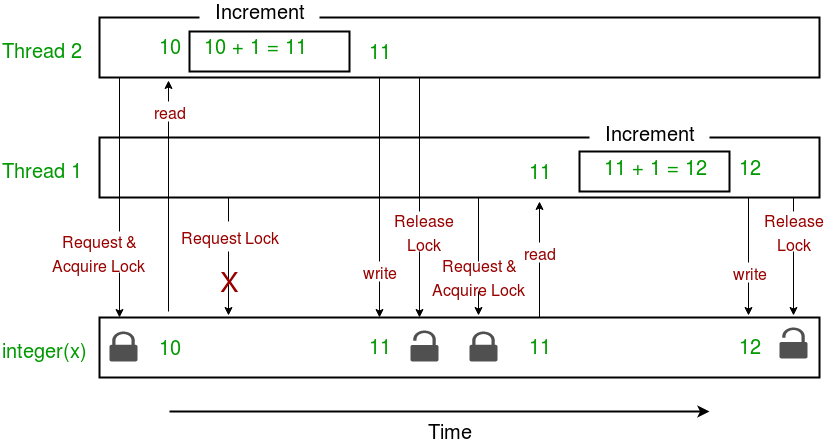

#  Multiprocessing

https://www.geeksforgeeks.org/multiprocessing-python-set-1/?ref=lbp

In [ ]:
import multiprocessing 

# empty list with global scope 
result = [] 

def square_list(mylist): 
	""" 
	function to square a given list 
	"""
	global result 
	# append squares of mylist to global list result 
	for num in mylist: 
		result.append(num * num) 
	# print global list result 
	print("Result(in process p1): {}".format(result)) 

if __name__ == "__main__": 
	# input list 
	mylist = [1,2,3,4] 

	# creating new process 
	p1 = multiprocessing.Process(target=square_list, args=(mylist,)) 
	# starting process 
	p1.start() 
	# wait until process is finished 
	p1.join() 

	# print global result list 
	print("Result(in main program): {}".format(result)) 


Result(in process p1): [1, 4, 9, 16]
Result(in main program): []


In [ ]:
# importing the multiprocessing module 
# two processes
import multiprocessing 

def print_cube(num): 
	""" 
	function to print cube of given num 
	"""
	print("Cube: {}".format(num * num * num)) 

def print_square(num): 
	""" 
	function to print square of given num 
	"""
	print("Square: {}".format(num * num)) 

if __name__ == "__main__": 
	# creating processes 
	p1 = multiprocessing.Process(target=print_square, args=(10, )) 
	p2 = multiprocessing.Process(target=print_cube, args=(10, )) 

	# starting process 1 
	p1.start() 
	# starting process 2 
	p2.start() 

	# wait until process 1 is finished 
	p1.join() 
	# wait until process 2 is finished 
	p2.join() 

	# both processes finished 
	print("Done!") 


Square: 100
Cube: 1000
Done!


# Synchronization multiprocessing


https://www.geeksforgeeks.org/synchronization-pooling-processes-python/?ref=lbp

https://www.geeksforgeeks.org/multiprocessing-python-set-1/?ref=lbp

https://www.geeksforgeeks.org/multiprocessing-python-set-2/?ref=lbp

In [ ]:
# Python program to illustrate 
# the concept of race condition 
# in multiprocessing 
import multiprocessing 

# function to withdraw from account 
def withdraw(balance):	 
	for _ in range(10000): 
		balance.value = balance.value - 1

# function to deposit to account 
def deposit(balance):	 
	for _ in range(10000): 
		balance.value = balance.value + 1

def perform_transactions(): 

	# initial balance (in shared memory) 
	balance = multiprocessing.Value('i', 100) 

	# creating new processes 
	p1 = multiprocessing.Process(target=withdraw, args=(balance,)) 
	p2 = multiprocessing.Process(target=deposit, args=(balance,)) 

	# starting processes 
	p1.start() 
	p2.start() 

	# wait until processes are finished 
	p1.join() 
	p2.join() 

	# print final balance 
	print("Final balance = {}".format(balance.value)) 

if __name__ == "__main__": 
	for _ in range(10): 

		# perform same transaction process 10 times 
		perform_transactions() 


Final balance = -118
Final balance = -370
Final balance = 350
Final balance = -1243
Final balance = -583
Final balance = 405
Final balance = 265
Final balance = 293
Final balance = 567
Final balance = 1367


Is everything ok?

Why?

# Shared memory
https://www.geeksforgeeks.org/multiprocessing-python-set-2/?ref=lbp
 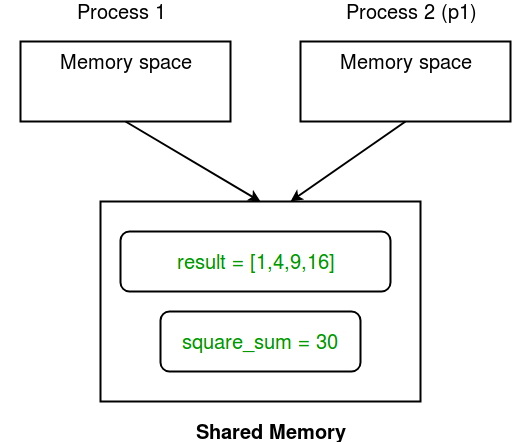

In [ ]:
import multiprocessing 

def square_list(mylist, result, square_sum): 
	""" 
	function to square a given list 
	"""
	# append squares of mylist to result array 
	for idx, num in enumerate(mylist): 
		result[idx] = num * num 

	# square_sum value 
	square_sum.value = sum(result) 

	# print result Array 
	print("Result(in process p1): {}".format(result[:])) 

	# print square_sum Value 
	print("Sum of squares(in process p1): {}".format(square_sum.value)) 

if __name__ == "__main__": 
	# input list 
	mylist = [1,2,3,4] 

	# creating Array of int data type with space for 4 integers 
	result = multiprocessing.Array('i', 4) 

	# creating Value of int data type 
	square_sum = multiprocessing.Value('i') 

	# creating new process 
	p1 = multiprocessing.Process(target=square_list, args=(mylist, result, square_sum)) 

	# starting process 
	p1.start() 

	# wait until process is finished 
	p1.join() 

	# print result array 
	print("Result(in main program): {}".format(result[:])) 

	# print square_sum Value 
	print("Sum of squares(in main program): {}".format(square_sum.value)) 


Result(in process p1): [1, 4, 9, 16]
Sum of squares(in process p1): 30
Result(in main program): [1, 4, 9, 16]
Sum of squares(in main program): 30


# Server process

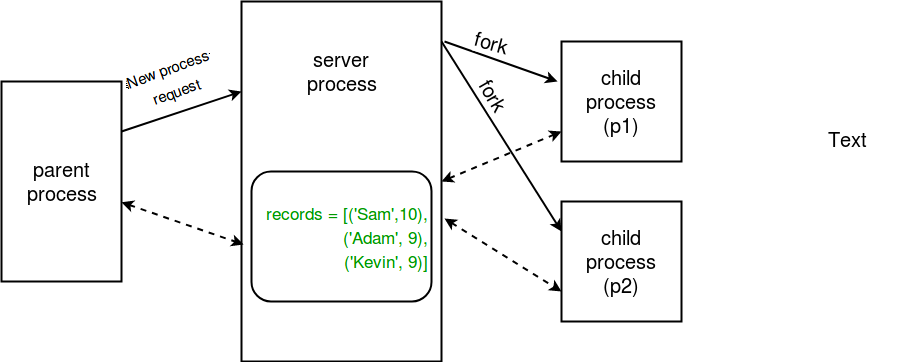

In [ ]:
import multiprocessing 

def print_records(records): 
	""" 
	function to print record(tuples) in records(list) 
	"""
	for record in records: 
		print("Name: {0}\nScore: {1}\n".format(record[0], record[1])) 

def insert_record(record, records): 
	""" 
	function to add a new record to records(list) 
	"""
	records.append(record) 
	print("New record added!\n") 

if __name__ == '__main__': 
	with multiprocessing.Manager() as manager: 
		# creating a list in server process memory 
		records = manager.list([('Sam', 10), ('Adam', 9), ('Kevin',9)]) 
		# new record to be inserted in records 
		new_record = ('Jeff', 8) 

		# creating new processes 
		p1 = multiprocessing.Process(target=insert_record, args=(new_record, records)) 
		p2 = multiprocessing.Process(target=print_records, args=(records,)) 

		# running process p1 to insert new record 
		p1.start() 
		p1.join() 

		# running process p2 to print records 
		p2.start() 
		p2.join() 


New record added!

Name: Sam
Score: 10

Name: Adam
Score: 9

Name: Kevin
Score: 9

Name: Jeff
Score: 8



# Interprocess communication
Queue example
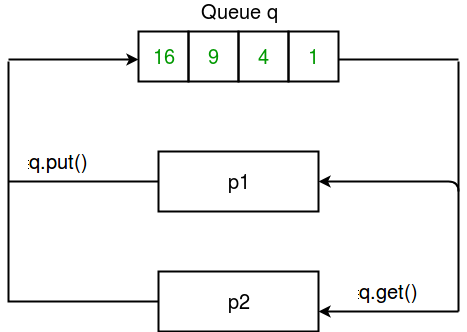


In [ ]:
import multiprocessing 

def square_list(mylist, q): 
	""" 
	function to square a given list 
	"""
	# append squares of mylist to queue 
	for num in mylist: 
		q.put(num * num) 

def print_queue(q): 
	""" 
	function to print queue elements 
	"""
	print("Queue elements:") 
	while not q.empty(): 
		print(q.get()) 
	print("Queue is now empty!") 

if __name__ == "__main__": 
	# input list 
	mylist = [1,2,3,4] 

	# creating multiprocessing Queue 
	q = multiprocessing.Queue() 

	# creating new processes 
	p1 = multiprocessing.Process(target=square_list, args=(mylist, q)) 
	p2 = multiprocessing.Process(target=print_queue, args=(q,)) 

	# running process p1 to square list 
	p1.start() 
	p1.join() 

	# running process p2 to get queue elements 
	p2.start() 
	p2.join() 


Queue elements:
1
4
9
16
Queue is now empty!


**pipe example**
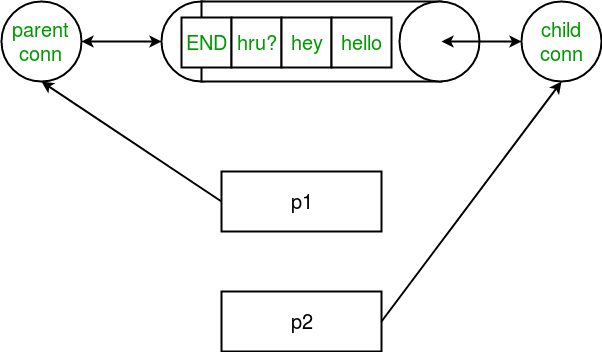


In [ ]:
import multiprocessing 

def sender(conn, msgs): 
	""" 
	function to send messages to other end of pipe 
	"""
	for msg in msgs: 
		conn.send(msg) 
		print("Sent the message: {}".format(msg)) 
	conn.close() 

def receiver(conn): 
	""" 
	function to print the messages received from other 
	end of pipe 
	"""
	while 1: 
		msg = conn.recv() 
		if msg == "END": 
			break
		print("Received the message: {}".format(msg)) 

if __name__ == "__main__": 
	# messages to be sent 
	msgs = ["hello", "hey", "hru?", "END"] 

	# creating a pipe 
	parent_conn, child_conn = multiprocessing.Pipe() 

	# creating new processes 
	p1 = multiprocessing.Process(target=sender, args=(parent_conn,msgs)) 
	p2 = multiprocessing.Process(target=receiver, args=(child_conn,)) 

	# running processes 
	p1.start() 
	p2.start() 

	# wait until processes finish 
	p1.join() 
	p2.join() 


Sent the message: hello
Sent the message: hey
Received the message: hello
Sent the message: hru?
Received the message: hey
Sent the message: END
Received the message: hru?


# Difference between multithreading and multiprocessing
https://www.geeksforgeeks.org/difference-between-multithreading-vs-multiprocessing-in-python/?ref=lbp

Try the following code snippet and read the above blog to undertand the different.

In [ ]:
import time, os 
from threading import Thread, current_thread 
from multiprocessing import Process, current_process 


COUNT = 200000000
SLEEP = 10

def io_bound(sec): 

	pid = os.getpid() 
	threadName = current_thread().name 
	processName = current_process().name 

	print(f"{pid} * {processName} * {threadName} 		---> Start sleeping...") 
	time.sleep(sec) 
	print(f"{pid} * {processName} * {threadName} 		---> Finished sleeping...") 

def cpu_bound(n): 

	pid = os.getpid() 
	threadName = current_thread().name 
	processName = current_process().name 

	print(f"{pid} * {processName} * {threadName} 		---> Start counting...") 

	while n>0: 
		n -= 1

	print(f"{pid} * {processName} * {threadName} 		---> Finished counting...") 
 


In [ ]:
start = time.time() 
io_bound(SLEEP) 
io_bound(SLEEP) 
end = time.time() 
print('Time taken in seconds -', end - start) 

In [ ]:
# Code snippet for Part 2 
start = time.time() 
t1 = Thread(target = io_bound, args =(SLEEP, )) 
t2 = Thread(target = io_bound, args =(SLEEP, )) 
t1.start() 
t2.start() 
t1.join() 
t2.join() 
end = time.time() 
print('Time taken in seconds -', end - start) 

In [ ]:
# Code snippet for Part 3 
start = time.time() 
cpu_bound(COUNT) 
cpu_bound(COUNT) 
end = time.time() 
print('Time taken in seconds -', end - start) 

In [ ]:
# Code snippet for Part 4 
start = time.time() 
t1 = Thread(target = cpu_bound, args =(COUNT, )) 
t2 = Thread(target = cpu_bound, args =(COUNT, )) 
t1.start() 
t2.start() 
t1.join() 
t2.join() 
end = time.time() 
print('Time taken in seconds -', end - start) 


In [ ]:
# Code snippet for Part 5 
start = time.time() 
p1 = Process(target = cpu_bound, args =(COUNT, )) 
p2 = Process(target = cpu_bound, args =(COUNT, )) 
p1.start() 
p2.start() 
p1.join() 
p2.join() 
end = time.time() 
print('Time taken in seconds -', end - start) 

In [ ]:
# Code snippet for Part 6 
start = time.time() 
p1 = Process(target = io_bound, args =(SLEEP, )) 
p2 = Process(target = io_bound, args =(SLEEP, )) 
p1.start() 
p2.start() 
p1.join() 
p2.join() 
end = time.time() 
print('Time taken in seconds -', end - start) 


# Homework2

Write merge sort using the pthreads and multiprocessing. Do the same experiments for your C homework.
 Use the same data input (10M elements).

In [ ]:
import random
import numpy as np

N = 10000000
rlist = []
for i in range(N):
  rlist.append(random.randint(0,5000))
rarr = np.array(rlist)
np.savetxt('test.dat',rarr,delimiter=',')

In [ ]:
#threads merge sort
# using lock and acquire
import threading
import time, random
# Python program for implementation of MergeSort

def mergeSort(arr):
    if len(arr) > 1:

         # Finding the mid of the array
        mid = len(arr)//2

        # Dividing the array elements
        L = arr[:mid]

        # into 2 halves
        R = arr[mid:]

        # Sorting the first half
        mergeSort(L)

        # Sorting the second half
        mergeSort(R)

        i = j = k = 0

        # Copy data to temp arrays L[] and R[]
        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1

        # Checking if any element was left
        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1

        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1


def mergeSortParallel(lock,arr,n):
    if n <= 0 or len(arr) <= 1:
        lock.acquire()
        mergeSort(arr)
        lock.release()
        return

    if len(arr) > 1:

         # Finding the mid of the array
        mid = len(arr)//2

        # Dividing the array elements
        L = arr[:mid]

        # into 2 halves
        R = arr[mid:]


        # creating a lock
        lock = threading.Lock()

        # creating threads
        # Sorting the first half
        
        t1 = threading.Thread(target=mergeSortParallel, args=(lock,L,n-1))
        # Sorting the second half
        t2 = threading.Thread(target=mergeSortParallel, args=(lock,R,n-1))
        # start threads
        t1.start()
        t2.start()

        # wait until threads finish their job
        t1.join()
        t2.join()

        i = j = k = 0

        # Copy data to temp arrays L[] and R[]
        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                lock.acquire()
                arr[k] = L[i]
                lock.release()
                i += 1
            else:
                lock.acquire()
                arr[k] = R[j]
                lock.release()
                j += 1
            k += 1

        # Checking if any element was left
        while i < len(L):
            lock.acquire()
            arr[k] = L[i]
            lock.release()
            i += 1
            k += 1

        while j < len(R):
            lock.acquire()
            arr[k] = R[j]
            lock.release()
            j += 1
            k += 1


# Driver Code
if __name__ == '__main__':
    n = 4 # 2**(n+1) - 1 processes will be instantiated.
    arr = np.loadtxt('test.dat', delimiter=',').tolist()
    lock = threading.Lock()
    start = time.time()
    t1 = threading.Thread(target=mergeSortParallel, args=(lock,arr,n))
    t1.start()

    t1.join()
    elapsed = time.time() - start
    print('Parallel mergesort: %f sec' % (elapsed))

# This code is contributed by Mayank Khanna



Parallel mergesort: 144.776044 sec


In [ ]:
#multiprocessing merge sort: at least 1 versions:
#  Try to use multiprocessing array

 
from multiprocessing import Process, Pipe
import time, random, sys

#Dependencies defined below main()

def main():

    lystbck = np.loadtxt('test.dat', delimiter=',').tolist()

    lyst = list(lystbck)
    # print(lyst)
    start = time.time()
    n = 4 #2**(n+1) - 1 processes will be instantiated.

    pconn, cconn = Pipe()
    p = Process(target=mergeSortParallel, \
                args=(lyst, cconn, n))
    p.start()
    lyst = pconn.recv()
    
    p.join()
    elapsed = time.time() - start


    print('Parallel mergesort: %f sec' % (elapsed))

def merge(left, right):
    ret = []
    li = ri = 0
    while li < len(left) and ri < len(right):
        if left[li] <= right[ri]:
            ret.append(left[li])
            li += 1
        else:
            ret.append(right[ri])
            ri += 1
    if li == len(left):
        ret.extend(right[ri:])
    else:
        ret.extend(left[li:])
    return ret

def mergesort(lyst):

    if len(lyst) <= 1:
        return lyst
    ind = len(lyst)//2
    return merge(mergesort(lyst[:ind]), mergesort(lyst[ind:]))


def mergeSortParallel(lyst, conn, procNum):
    if procNum <= 0 or len(lyst) <= 1:
        conn.send(mergesort(lyst))
        conn.close()
        return

    ind = len(lyst)//2

    pconnLeft, cconnLeft = Pipe()
    leftProc = Process(target=mergeSortParallel, \
                       args=(lyst[:ind], cconnLeft, procNum - 1))

    pconnRight, cconnRight = Pipe()
    rightProc = Process(target=mergeSortParallel, \
                       args=(lyst[ind:], cconnRight, procNum - 1))

    leftProc.start()
    rightProc.start()

    conn.send(merge(pconnLeft.recv(), pconnRight.recv()))
    conn.close()

    leftProc.join()
    rightProc.join()


if __name__ == '__main__':
    main()

Parallel mergesort: 110.627172 sec


Your explanation goes here about the time /speedup 

-Which one is faster and why?


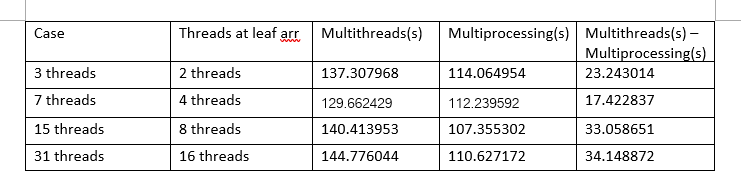

Multiprocessing เร็วกว่า Multithreading

เพราะ Multithread ไม่ได้ทำให้ code ทำงานแบบ parallel จริงๆ แค่สลับกันทำงานในเวลาเดียวกัน แต่ Multiprocessing ทำให้ทำงานแบบ parallel จริงๆ ที่ไม่ได้มีการ share memory กัน จึงทำให้ามารถทำงานได้เร็วกว่า

what are the other possible solutions beside the multiprocessing array?

Give 1 answer:

Your answer goes here....


Multithreading